In [22]:
import numpy as np
import pandas as pd
import scipy.io as sio
import scipy.spatial as sspatial
import matplotlib.pyplot as plt
from numpy.matlib import repmat
from sklearn.cluster import KMeans
from collections import Counter

In [25]:
# load and inspect the dataset
data_path = 'data.csv'  
data = pd.read_csv(data_path)

In [26]:
# select features and labels
features = data.drop(columns = ['filename', 'label'])
labels = data['label']

In [27]:
features_np = features.to_numpy()

In [6]:
features_np

array([[103.359375  ,  50.        ,   0.38026021, ...,   0.96592174,
         -7.57082475,   2.91898694],
       [ 95.703125  ,  44.        ,   0.30645087, ...,  -2.4364898 ,
          3.31691261,  -0.60848489],
       [151.99908088,  75.        ,   0.2534871 , ..., -11.71926356,
        -11.02521621, -13.38726005],
       ...,
       [103.359375  ,  45.        ,   0.37283411, ...,  -0.84219157,
         -4.66599567,  -4.78767685],
       [112.34714674,  45.        ,   0.34447207, ...,  -1.90380308,
         -2.19675262,  -3.39514817],
       [ 75.99954044,  36.        ,   0.36009823, ...,  -0.39709724,
         -4.34992122,  -4.22099848]])

In [7]:
def similarity(xi, xj, sigma=1.0):
    '''
    calculates RBF similarity between two vectors of the same size
    
    parameters: 
        xi, xj are numpy arrays or other iterable defining two vectors
        sigma is the RBF normalization constant (default 1.0)
    returns: 
        the RBF similarity function defined in the cell above for xi, xj
    '''
    return np.exp(-(np.linalg.norm(xi-xj)**2)/(2*sigma**2))

In [8]:
def construct_similarity_matrix(X, sigma=1.0):
    '''
    calculates an affinity matrix using RBF similarity between rows of a matrix
    
    parameters:
        X is an NxD matrix
        sigma is the RBF normalization constant (default 1.0)
    returns:
        the NxN affinity matrix 
    '''
    
    N = X.shape[0]
    similarity_matrix = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            similarity_matrix[i, j] = similarity(X[i], X[j], sigma)
    return similarity_matrix

In [9]:
distances = sspatial.distance.pdist(features_np, metric='euclidean')
sigma = np.median(distances)
sigma

1794.3066156580537

In [10]:
A = construct_similarity_matrix(features_np, sigma=sigma)

In [11]:
A

array([[1.        , 0.43987415, 0.69473906, ..., 0.71039179, 0.83230054,
        0.96183166],
       [0.43987415, 1.        , 0.88325627, ..., 0.8887763 , 0.79324811,
        0.31885287],
       [0.69473906, 0.88325627, 1.        , ..., 0.99462487, 0.94406977,
        0.56906531],
       ...,
       [0.71039179, 0.8887763 , 0.99462487, ..., 1.        , 0.96231165,
        0.57601568],
       [0.83230054, 0.79324811, 0.94406977, ..., 0.96231165, 1.        ,
        0.69629233],
       [0.96183166, 0.31885287, 0.56906531, ..., 0.57601568, 0.69629233,
        1.        ]])

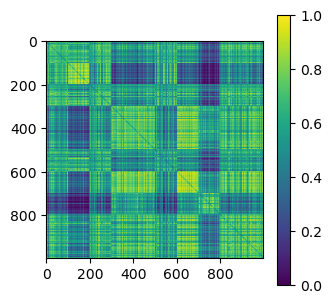

In [12]:
plt.figure(figsize=(3.5,3.5));
plt.imshow(A - np.diag(np.diag(A)));
plt.colorbar();

In [13]:
D = np.diag(A.sum(axis=1))

D_inv_sqrt = np.diag(1.0 / np.sqrt(D.diagonal()))
L = np.eye(A.shape[0]) - D_inv_sqrt @ A @ D_inv_sqrt

eigenvalues, eigenvectors = np.linalg.eigh(L)
min_eigenvectors = eigenvectors[:, :2]

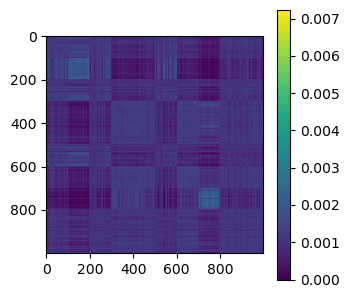

In [14]:
# Visualize Laplacian matrix
plt.figure(figsize=(3.5,3.5))
plt.imshow(-(L - np.diag(np.diag(L))))
plt.colorbar()

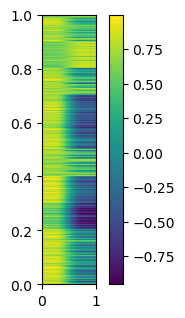

In [15]:
# Normalizing the eigenvectors for K_Means
divmat = np.sqrt(np.sum(min_eigenvectors**2, axis=1)).reshape(-1, 1)
Y = min_eigenvectors / divmat

plt.figure(figsize=(3.5,3.5));
plt.imshow(Y, aspect=5, extent=[0, 1, 0, 1]);
plt.colorbar();

In [16]:
# Run kmeans on eigenvectors and plot spectral clustering
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters).fit(Y)
kk = kmeans.labels_
clusters = []
for i in range(num_clusters):
    clusters.append(np.argwhere(kk == i))

In [33]:
kk

array([5, 9, 4, 4, 0, 5, 8, 0, 9, 9, 9, 9, 8, 9, 4, 1, 8, 0, 9, 0, 3, 4,
       0, 3, 4, 8, 5, 3, 7, 4, 4, 3, 5, 8, 0, 4, 5, 3, 3, 9, 4, 0, 4, 9,
       5, 3, 4, 0, 4, 9, 8, 9, 0, 0, 8, 9, 9, 0, 7, 4, 8, 5, 4, 8, 4, 9,
       4, 1, 8, 9, 9, 7, 9, 9, 3, 9, 4, 3, 4, 0, 9, 1, 4, 3, 0, 9, 8, 7,
       9, 0, 0, 9, 4, 4, 4, 5, 0, 7, 5, 3, 5, 4, 9, 4, 9, 9, 9, 9, 4, 0,
       4, 9, 9, 0, 9, 9, 9, 9, 9, 9, 5, 9, 9, 4, 9, 4, 0, 9, 4, 4, 4, 9,
       9, 9, 9, 9, 4, 9, 9, 9, 9, 4, 5, 9, 9, 9, 9, 4, 4, 9, 4, 9, 9, 9,
       9, 9, 8, 9, 0, 9, 9, 9, 9, 4, 9, 9, 4, 4, 9, 0, 4, 9, 3, 4, 4, 9,
       9, 9, 4, 9, 4, 9, 4, 9, 9, 9, 9, 4, 9, 9, 9, 9, 9, 4, 9, 9, 9, 9,
       4, 9, 7, 3, 7, 8, 0, 2, 4, 4, 2, 9, 3, 4, 4, 8, 6, 4, 0, 3, 4, 7,
       0, 2, 5, 6, 3, 5, 0, 9, 2, 1, 0, 0, 0, 7, 5, 9, 4, 4, 0, 5, 0, 8,
       5, 5, 5, 8, 0, 4, 4, 9, 4, 8, 9, 4, 2, 5, 1, 1, 7, 5, 4, 9, 9, 5,
       4, 5, 4, 4, 2, 4, 4, 5, 1, 4, 4, 9, 9, 0, 4, 0, 5, 9, 9, 3, 4, 3,
       4, 9, 0, 4, 9, 0, 0, 5, 0, 0, 0, 9, 2, 4, 7,

In [20]:
for cluster in clusters:
    print(len(cluster))

110
96
75
98
118
96
87
86
103
131


In [28]:
len(labels)

1000

In [34]:
# Label the clusters
count_correct = 0
for cluster in clusters:
    counter = Counter([labels[i] for [i] in cluster])
    most_common, count = counter.most_common(1)[0]
    count_correct += count
    print(most_common)

reggae
metal
pop
rock
classical
country
pop
hiphop
disco
classical


In [35]:
count_correct/len(labels)

0.297